TESTED FEATURES: 
Index(['vel5', 'vel10', 'vel15', 'vel30', 'vel60', 'acc5', 'acc10', 'acc15',
       'stoch12', 'stochDiff6012', 'RSIhl_diff', 'RSIhl_diffROC', 'vol',
       'vol10', 'vol15', 'vol30', 'ToD', 'DoW', 'MO'],
      dtype='object')
TESTING FOR: 
Dr3
0.009290203427050343
1.5738882371396439
472/472 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


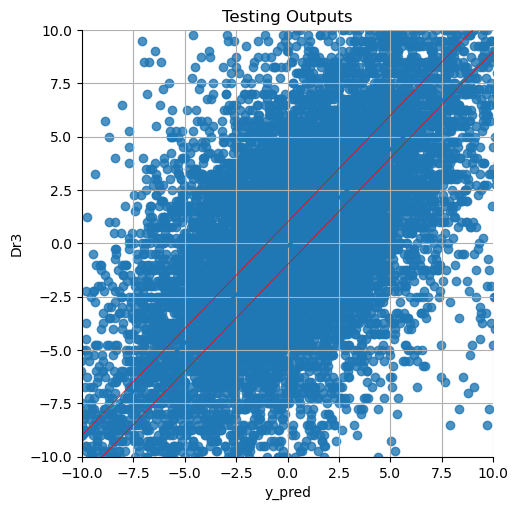

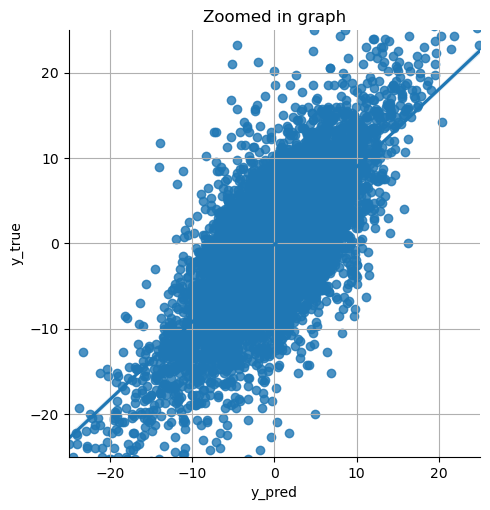

In [40]:
#JJ McCauley + LOGAN KELSCH 
#TEST NN 1

#IMPORT LIBRARIES-------------------------------------------------------

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from keras.optimizers import SGD
from keras.initializers import GlorotUniform
from keras.initializers import RandomNormal
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

#hahaha dont turn this on with high epoch or else
#tf.config.experimental.set_memory_growth

#LOAD DATA FROM CSV-------------------------------------------------------

# Load the dataset
data = pd.read_csv('catted__6dayTest_1.csv')
dataTRAIN = pd.read_csv('catted_1.csv')

#      'Dr1' 'Dr3' 'Mr1' 'Mr3' 
testFor = 'Dr3'
timeSteps = 24
tType = testFor[0]
#testing random feature drops
#TREND

data = data.drop(columns='FT')
data = data.drop(columns='FT.1')
data = data.drop(columns='FT.2')
data = data.drop(columns='YM_diff')
data = data.drop(columns='NQ_diff')
data = data.drop(columns='volNQdiff')
data = data.drop(columns='volYMdiff')
dataTRAIN = dataTRAIN.drop(columns='FT')
dataTRAIN = dataTRAIN.drop(columns='FT.1')
dataTRAIN = dataTRAIN.drop(columns='FT.2')
dataTRAIN = dataTRAIN.drop(columns='YM_diff')
dataTRAIN = dataTRAIN.drop(columns='NQ_diff')
dataTRAIN = dataTRAIN.drop(columns='volNQdiff')
dataTRAIN = dataTRAIN.drop(columns='volYMdiff')

data = data.drop(columns='vol60')
data = data.drop(columns='volD10')
data = data.drop(columns='volD15')
data = data.drop(columns='volD30')
data = data.drop(columns='volD60')
data = data.drop(columns='vpm5')
data = data.drop(columns='vpm10')
data = data.drop(columns='vpm15')
data = data.drop(columns='vpm30')
data = data.drop(columns='vpm60')
data = data.drop(columns='acc30')
data = data.drop(columns='acc60')
dataTRAIN = dataTRAIN.drop(columns='vol60')
dataTRAIN = dataTRAIN.drop(columns='volD10')
dataTRAIN = dataTRAIN.drop(columns='volD15')
dataTRAIN = dataTRAIN.drop(columns='volD30')
dataTRAIN = dataTRAIN.drop(columns='volD60')
dataTRAIN = dataTRAIN.drop(columns='vpm5')
dataTRAIN = dataTRAIN.drop(columns='vpm10')
dataTRAIN = dataTRAIN.drop(columns='vpm15')
dataTRAIN = dataTRAIN.drop(columns='vpm30')
dataTRAIN = dataTRAIN.drop(columns='vpm60')
dataTRAIN = dataTRAIN.drop(columns='acc30')
dataTRAIN = dataTRAIN.drop(columns='acc60')


#CALENDAR
#--------------------------------------
#SOLUTION------------------------------
data = data.drop(columns=['Mc1','Mc3','Dc1','Dc3'])
dataTRAIN = dataTRAIN.drop(columns=['Mc1','Mc3','Dc1','Dc3'])
match testFor:
    case 'Dr1':
        data = data.drop(columns='Dr3')
        data = data.drop(columns='Mr1')
        data = data.drop(columns='Mr3')
        dataTRAIN = dataTRAIN.drop(columns='Dr3')
        dataTRAIN = dataTRAIN.drop(columns='Mr1')
        dataTRAIN = dataTRAIN.drop(columns='Mr3')
    case 'Dr3':
        data = data.drop(columns='Dr1')
        data = data.drop(columns='Mr1')
        data = data.drop(columns='Mr3')
        dataTRAIN = dataTRAIN.drop(columns='Dr1')
        dataTRAIN = dataTRAIN.drop(columns='Mr1')
        dataTRAIN = dataTRAIN.drop(columns='Mr3')
    case 'Mr1':
        data = data.drop(columns='Dr1')
        data = data.drop(columns='Dr3')
        data = data.drop(columns='Mr3')
        dataTRAIN = dataTRAIN.drop(columns='Dr1')
        dataTRAIN = dataTRAIN.drop(columns='Dr3')
        dataTRAIN = dataTRAIN.drop(columns='Mr3')
    case 'Mr3':
        data = data.drop(columns='Dr1')
        data = data.drop(columns='Dr3')
        data = data.drop(columns='Mr1')
        dataTRAIN = dataTRAIN.drop(columns='Dr1')
        dataTRAIN = dataTRAIN.drop(columns='Dr3')
        dataTRAIN = dataTRAIN.drop(columns='Mr1')


#confirming X and Y features post training
Xfeatures = data.columns[:-1]
Yfeatures = data.columns[-1]
print("TESTED FEATURES: ")
print(Xfeatures)
print("TESTING FOR: ")
print(Yfeatures)

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

XTRAIN = dataTRAIN.iloc[:, :-1].values
yTRAIN = dataTRAIN.iloc[:, -1].values

# Standardize the features
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = MinMaxScaler(feature_range=(-1,1))

percFit = 0.8
fitSplit = len(X)//(1/(percFit))
negFitSplit = len(X)//(1/(1-percFit))

scaler1.fit(X)
XTRAIN = scaler1.transform(XTRAIN)
#scaler3.fit(XTRAIN)

X = scaler1.transform(X)
#X = scaler3.transform(X)

#setting data for LSTM
def reformat_to_lstm(dat, time_steps=timeSteps):
    X_lstm, y_lstm = [], []
    
    for i in range(time_steps, len(dat)+1):
        # Collect previous time_steps rows for X
        X_lstm.append(dat[i-time_steps:i])  
        # The corresponding y value for the last time step in the sequence
    
    X_lstm = np.array(X_lstm)
    
    return X_lstm

X = reformat_to_lstm(X, timeSteps)
y = y[timeSteps-1:]
XTRAIN = reformat_to_lstm(XTRAIN, timeSteps)
yTRAIN = yTRAIN[timeSteps-1:]

mos = X[:, timeSteps-1, len(Xfeatures)-1].mean()
print(mos)

def remove_zero_mo_samples(X, y):
    # Get the 'MO' column (index 34 for 0-based indexing) for all time steps and samples
    non_zero_indices = (X[:, timeSteps-1, len(Xfeatures)-1] >= 0)
    # Filter X and y using these indices
    X_filtered = X[non_zero_indices]
    y_filtered = y[non_zero_indices]
    return X_filtered, y_filtered

X, y = remove_zero_mo_samples(X, y)
XTRAIN, yTRAIN = remove_zero_mo_samples(XTRAIN, yTRAIN)

mos = X[:, timeSteps-1, len(Xfeatures)-1].mean()
print(mos)

loaded_model = tf.keras.models.load_model('LSTM_Dr3_24step_6.keras')
loaded_model.compile(optimizer='adam',
                  loss='mse'
                  ,metrics=['R2Score','root_mean_squared_error'])

#predicting the test set results
y_pred = loaded_model.predict(XTRAIN) 

import seaborn as sns
y_pred = np.squeeze(y_pred)
ys = pd.DataFrame({"y_pred":y_pred,"y_true":yTRAIN})
#data.insert(1, "y_pred", y_pred, True)
# plot 1 with axes level-plot
g = sns.lmplot(data=ys,x="y_pred", y="y_true")#, hue="MO")

#plt.scatter(y_pred, y, s=1)
plt.axis('tight')
plt.grid()
plt.title('Testing Outputs')
plt.xlabel('y_pred')
plt.ylabel(testFor)

# Get the current axes from the lmplot
ax = plt.gca()

# Define the limits for the line (should cover the same range as your plot)
x_vals = np.array(ax.get_xlim())
y_vals = x_vals  # Since y = x

# Plot the y=x line
plt.plot(x_vals+1, y_vals, '-', color='red', label='y = x', linewidth=0.5)
plt.plot(x_vals-1, y_vals, '-', color='red', label='y = x', linewidth=0.5)

match tType:
    case 'D':
        plt.xlim(-10,10)
        plt.ylim(-10,10)
    case _:
        plt.xlim(0,5)
        plt.ylim(0,5)
plt.show()

g = sns.lmplot(data=ys,x="y_pred", y="y_true")#, hue="MO")
plt.title('Zoomed in graph')
plt.grid()
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.show()



In [12]:
data.corr()
#print(X.shape)

,vel5,y_pred,vel10,vel15,vel30,vel60,acc5,acc10,acc15,acc30,...,volD60,vpm5,vpm10,vpm15,vpm30,vpm60,ToD,DoW,MO,Dr1
vel5,1.000000,-0.058807,0.686600,0.573628,0.405445,0.287259,0.727680,0.477175,0.405585,0.286404,...,-0.046296,0.473161,0.343113,0.287426,0.218383,0.175200,-0.005184,-0.021414,0.076837,-0.057056
y_pred,-0.058807,1.000000,-0.030227,-0.029721,-0.026763,-0.005756,-0.052429,-0.025792,-0.015288,-0.032204,...,-0.021812,-0.043897,-0.048633,-0.057402,-0.046929,-0.038676,-0.005018,-0.019127,0.079673,0.999832
vel10,0.686600,-0.030227,1.000000,0.802890,0.577045,0.410924,0.000941,0.712478,0.558378,0.405355,...,-0.068166,0.294843,0.494415,0.395995,0.294090,0.235742,-0.007875,-0.031435,0.113674,-0.028476
vel15,0.573628,-0.029721,0.802890,1.000000,0.703732,0.503520,0.031503,0.284790,0.710348,0.492043,...,-0.055947,0.223509,0.361611,0.489839,0.341288,0.280364,-0.009116,-0.037855,0.133982,-0.028645
vel30,0.405445,-0.026763,0.577045,0.703732,1.000000,0.708860,0.013348,0.008986,-0.000161,0.705910,...,-0.021321,0.133924,0.218761,0.280461,0.476465,0.350890,-0.008653,-0.050930,0.164926,-0.025238
vel60,0.287259,-0.005756,0.410924,0.503520,0.708860,1.000000,0.007515,0.004226,0.006522,0.000802,...,0.030770,0.099880,0.155298,0.200747,0.303501,0.479301,-0.003331,-0.064196,0.197138,-0.004303
acc5,0.727680,-0.052429,0.000941,0.031503,0.013348,0.007515,1.000000,-0.015886,0.030960,0.011540,...,0.000588,0.372552,0.005343,0.021635,0.022908,0.018594,0.000257,0.000211,-0.001525,-0.051674
acc10,0.477175,-0.025792,0.712478,0.284790,0.008986,0.004226,-0.015886,1.000000,0.391879,0.008358,...,-0.047081,0.239255,0.406139,0.178138,0.034122,0.026065,-0.003127,-0.001623,0.015946,-0.024510
acc15,0.405585,-0.015288,0.558378,0.710348,-0.000161,0.006522,0.030960,0.391879,1.000000,-0.006835,...,-0.057662,0.181805,0.292202,0.411603,0.008247,0.046888,-0.004089,-0.002985,0.025281,-0.015287
acc30,0.286404,-0.032204,0.405355,0.492043,0.705910,0.000802,0.011540,0.008358,-0.006835,1.000000,...,-0.061018,0.089542,0.154064,0.195918,0.370583,0.016202,-0.008963,-0.007655,0.036004,-0.031497
